In [702]:
import numpy as np
import matplotlib.pyplot as plt

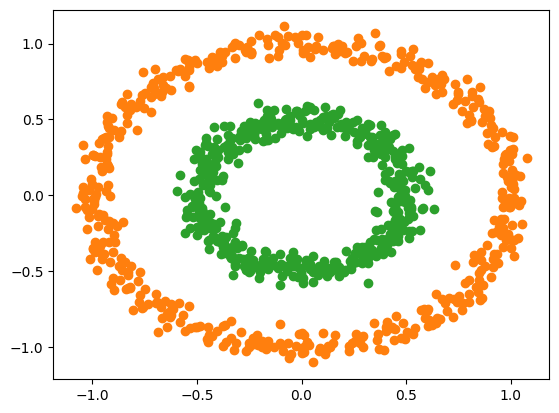

In [703]:
t = np.linspace(-5, 5, 500)
x1 = np.sin(np.pi*t) + np.random.normal(0, 0.05, 500)
y1 = np.cos(np.pi*t) + np.random.normal(0, 0.05, 500)
plt.scatter(x1, y1, s = 10)

x2 = 0.5*np.sin(np.pi*t) + np.random.normal(0, 0.05, 500)
y2 = 0.5*np.cos(np.pi*t) + np.random.normal(0, 0.05, 500)


D1 = np.concatenate((x1.reshape((500,1)), y1.reshape(500,1)), axis=1)
D2 = np.concatenate((x2.reshape((500,1)), y2.reshape(500,1)), axis=1)
plt.scatter(D1[:, 0], D1[:, 1])
plt.scatter(D2[:, 0], D2[:, 1])
plt.show()

X = np.concatenate((D1, D2), axis=0)
Y = np.ones(np.size(X,0))
Y[500:] = 0

In [704]:
X = X.T
print(X.shape)
Y = (Y.T).reshape((1, X.shape[1]))
print(Y.shape)
print(Y)

(2, 1000)
(1, 1000)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1

In [705]:
def get_layers(x, y):
  input_layer_count = X.shape[0]
  hidden_layer_count = 5
  output_layer_count = Y.shape[0]
  return (input_layer_count, hidden_layer_count, output_layer_count)

nb_input_nodes, nb_hidden_nodes, nb_output_nodes = get_layers(X, Y)
print("Input Layer Size {}".format(nb_input_nodes))
print("Hidden Layer Size {}".format(nb_hidden_nodes))
print("Output Layer Size {}".format(nb_output_nodes))
  

Input Layer Size 2
Hidden Layer Size 5
Output Layer Size 1


In [706]:
def initialization(nb_input_nodes, nb_hidden_nodes, nb_output_nodes):
  W1 = np.random.randn(nb_hidden_nodes, nb_input_nodes)
  W2 = np.random.randn(nb_output_nodes, nb_hidden_nodes)

  b1 = np.zeros((nb_hidden_nodes, 1))
  b2 = np.zeros((nb_output_nodes, 1))

  params = [W1, b1, W2, b2]
  return params

In [707]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [708]:
def forwardProp(x, params):
  W1 = params[0]
  b1 = params[1]
  W2 = params[2]
  b2 = params[3]

  Z1 = np.dot(W1, x) + b1
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  stored = {
    "Z1": Z1,
    "A1": A1,
    "Z2": Z2,
    "A2": A2
  }

  return A2, stored

In [709]:
def cross_entropy_loss(a2, y, params):
  m = y.shape[1]
  log_probabilities = np.multiply(np.log(a2), Y) + np.multiply((1-Y), np.log(1 - a2))
  loss = -np.sum(log_probabilities) / m
  loss = float(np.squeeze(loss))

  return loss

In [710]:
def backprop(params, stored, x, y):
  m = y.shape[1]

  W1 = params[0]
  W2 = params[2]

  A1 = stored['A1']
  A2 = stored['A2']

  delZ2 = A2 - Y
  delW2 = np.dot(delZ2, A1.T) / m
  delb2 = np.sum(delZ2, axis = 1, keepdims=True) / m
  delZ1 = np.multiply(np.dot(W2.T, delZ2), 1 - np.power(A1, 2))
  delW1 = np.dot(delZ1, X.T) / m
  delb1 = np.sum(delZ1, axis = 1, keepdims=True) / m

  gradient = {
    "W1": delW1,
    "b1": delb1,
    "W2": delW2,
    "b2": delb2
  }

  return gradient

In [711]:
def gradient_descent(params, gradient, eta = 0.001):
  W1 = params[0]
  b1 = params[1]
  W2 = params[2]
  b2 = params[3]

  delW1 = gradient["W1"]
  delb1 = gradient["b1"]
  delW2 = gradient["W2"]
  delb2 = gradient["b2"]


  W1 = W1 - eta * delW1
  b1 = b1 - eta * delb1
  W2 = W2 - eta * delW2
  b2 = b2 - eta * delb2

  params = [W1, b1, W2, b2]

  return params


In [712]:

def MLP(x, y, nb_hidden_nodes, nb_epochs = 100):
  nb_input_nodes = get_layers(x, y)[0]
  nb_output_nodes = get_layers(x, y)[2]

  params = initialization(nb_hidden_nodes=nb_hidden_nodes, nb_output_nodes=nb_output_nodes, nb_input_nodes=nb_input_nodes)

  W1 = params[0]
  b1 = params[1]
  W2 = params[2]
  b2 = params[3]

  for i in range(0, nb_epochs):
    A2, stored = forwardProp(x=x, params=params)
    loss = cross_entropy_loss(a2=A2, y=y, params=params)
    gradient = backprop(params, stored, x=x, y=y)
    params = gradient_descent(params=params, gradient=gradient)
    if i == 0:
      print("Loss after first epoch = {}".format(loss))

  print("Loss after final epoch = {}".format(loss))
  return params

params = MLP(X, Y, 20, 100)



Loss after first epoch = 1.288836368671241
Loss after final epoch = 1.2135617885842858


In [713]:
def classify(x, params):
  A2, stored = forwardProp(x, params)
  Y_classified = np.round(A2)

  return Y_classified

Y_classified = classify(X, params)
print(Y_classified.shape)

(1, 1000)


In [714]:
def evaluate(y_real, y_classified):
  successes = 0
  m = y_real.shape[1]
  for i in range(m):
    if y_real[0][i] == y_classified[0][i]:
      successes += 1
  return successes / m

success_rate = evaluate(Y, Y_classified)
print("Success rate is {}%".format(success_rate * 100))


Success rate is 63.2%
